FETCHING DATA FROM AN API (HERE : MOVIES DATA FROM API )***bold text***

In [6]:
import requests
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=256da2d742d5a5979790e6833447e4b4').json()
Popularity = []
Vote_count = []
Orignal_lang = []
Title = []
Vote_avg = []
Overview = []
Release_Data = []

for i in response['results']:
    Popularity.append(i['popularity'])
    Vote_count.append(i['vote_count'])
    Orignal_lang.append(i['original_language'])
    Title.append(i['title'])
    Vote_avg.append(i['vote_average'])
    Overview.append(i['overview'])
    Release_Data.append(i['release_date'])

df = {'title':Title,'Overview':Overview,'Orignal_lang':Orignal_lang,'Release_Data':Release_Data,'Popularity':Popularity,'Vote_count':Vote_count,'Vote_avg':Vote_avg}
print(df)











{'title': ['Lilo & Stitch', 'Sinners', 'A Minecraft Movie', 'Sikandar', 'A Working Man', 'Final Destination Bloodlines', 'Shadow Force', 'Mission: Impossible - The Final Reckoning', 'The Last Stand of Ellen Cole', 'Until Dawn', 'Warfare', 'The Ugly Stepsister', 'Captain America: Brave New World', 'Lilo & Stitch', 'The Containment', 'Snow White', "A Widow's Game", 'Mountainhead', 'Tin Soldier', 'Thunderbolts*'], 'Overview': ['The wildly funny and touching story of a lonely Hawaiian girl and the fugitive alien who helps to mend her broken family.', 'Trying to leave their troubled lives behind, twin brothers return to their hometown to start again, only to discover that an even greater evil is waiting to welcome them back.', "Four misfits find themselves struggling with ordinary problems when they are suddenly pulled through a mysterious portal into the Overworld: a bizarre, cubic wonderland that thrives on imagination. To get back home, they'll have to master this world while embarking o

In [7]:
#This will import all the libraries for this purpose of making all the code execute
pip install pandas matplotlib seaborn requests

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from API :-
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=256da2d742d5a5979790e6833447e4b4').json()

# Initialize lists

Popularity = []
Vote_count = []
Orignal_lang = []
Title = []
Vote_avg = []
Overview = []
Release_Data = []

# Extract data
for i in response['results']:
    Popularity.append(i['popularity'])
    Vote_count.append(i['vote_count'])
    Orignal_lang.append(i['original_language'])
    Title.append(i['title'])
    Vote_avg.append(i['vote_average'])
    Overview.append(i['overview'])
    Release_Data.append(i['release_date'])

# Create a DataFrame
df = pd.DataFrame({
    'Title': Title,
    'Overview': Overview,
    'Original Language': Orignal_lang,
    'Release Date': Release_Data,
    'Popularity': Popularity,
    'Vote Count': Vote_count,
    'Vote Average': Vote_avg
})

# Print the DataFrame
print("First few rows of the data:")
print(df.head())

# Set Seaborn style
sns.set(style="whitegrid")


First few rows of the data:
               Title                                           Overview  \
0      Lilo & Stitch  The wildly funny and touching story of a lonel...   
1            Sinners  Trying to leave their troubled lives behind, t...   
2  A Minecraft Movie  Four misfits find themselves struggling with o...   
3           Sikandar  A tragic accident pushes the powerful Sikandar...   
4      A Working Man  Levon Cade left behind a decorated military ca...   

  Original Language Release Date  Popularity  Vote Count  Vote Average  
0                en   2025-05-17    605.7405         465          7.06  
1                en   2025-04-16    476.8801        1090          7.50  
2                en   2025-03-31    361.4950        1633          6.50  
3                hi   2025-03-29    335.4609          41          5.22  
4                en   2025-03-26    296.6149        1142          6.70  


<ipython-input-9-b90f38a059c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Popularity', y='Title', data=top_pop, palette='viridis')


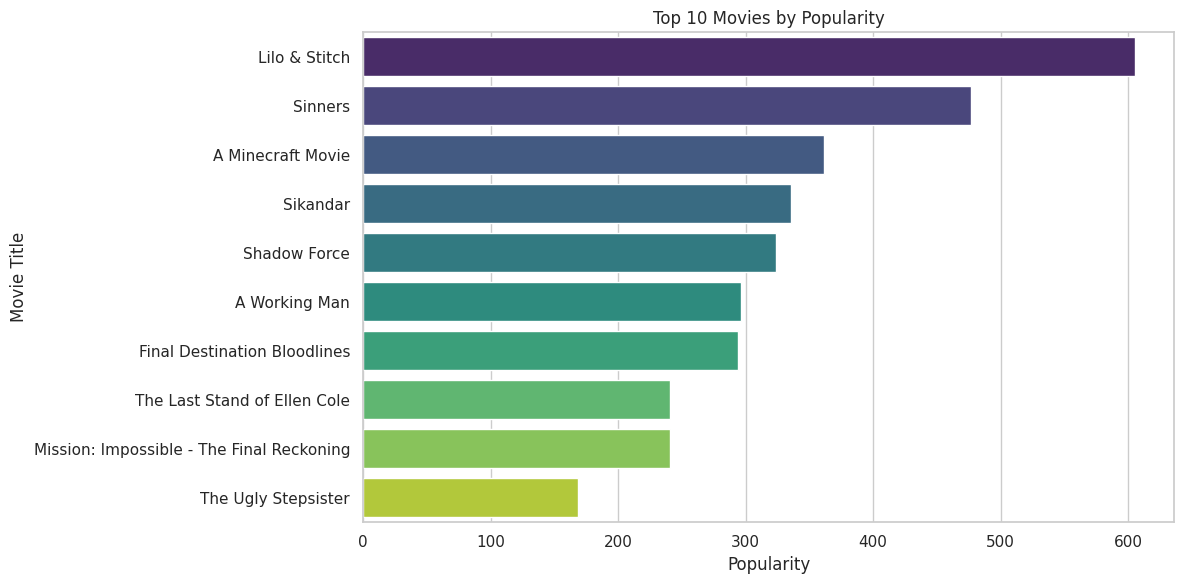

In [9]:
# 1. Top 10 Movies by Popularity
plt.figure(figsize=(12, 6))
top_pop = df.sort_values(by='Popularity', ascending=False).head(10)
sns.barplot(x='Popularity', y='Title', data=top_pop, palette='viridis')
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()

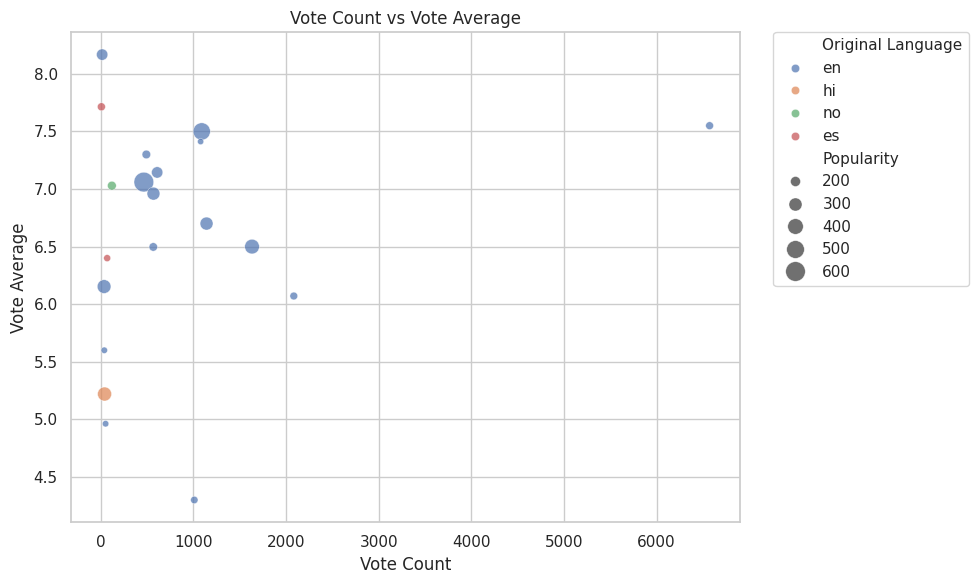

In [10]:
# 2. Vote Count vs Vote Average (Scatter)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vote Count', y='Vote Average', hue='Original Language', size='Popularity', data=df, sizes=(20, 200), alpha=0.7)
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

<ipython-input-11-eac9f011bc83>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_avg.index, y=lang_avg.values, palette='Set2')


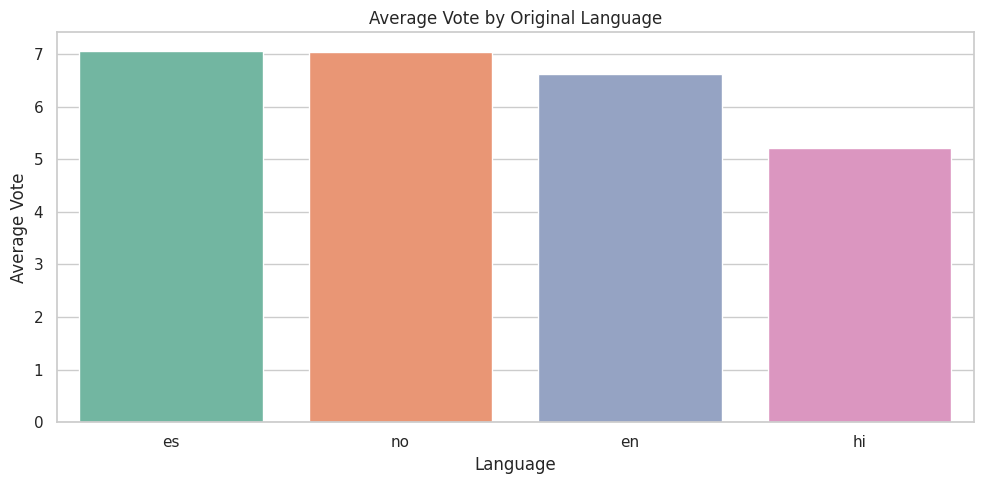

In [11]:
# 3. Average Vote by Language
plt.figure(figsize=(10, 5))
lang_avg = df.groupby('Original Language')['Vote Average'].mean().sort_values(ascending=False)
sns.barplot(x=lang_avg.index, y=lang_avg.values, palette='Set2')
plt.title('Average Vote by Original Language')
plt.xlabel('Language')
plt.ylabel('Average Vote')
plt.tight_layout()
plt.show()

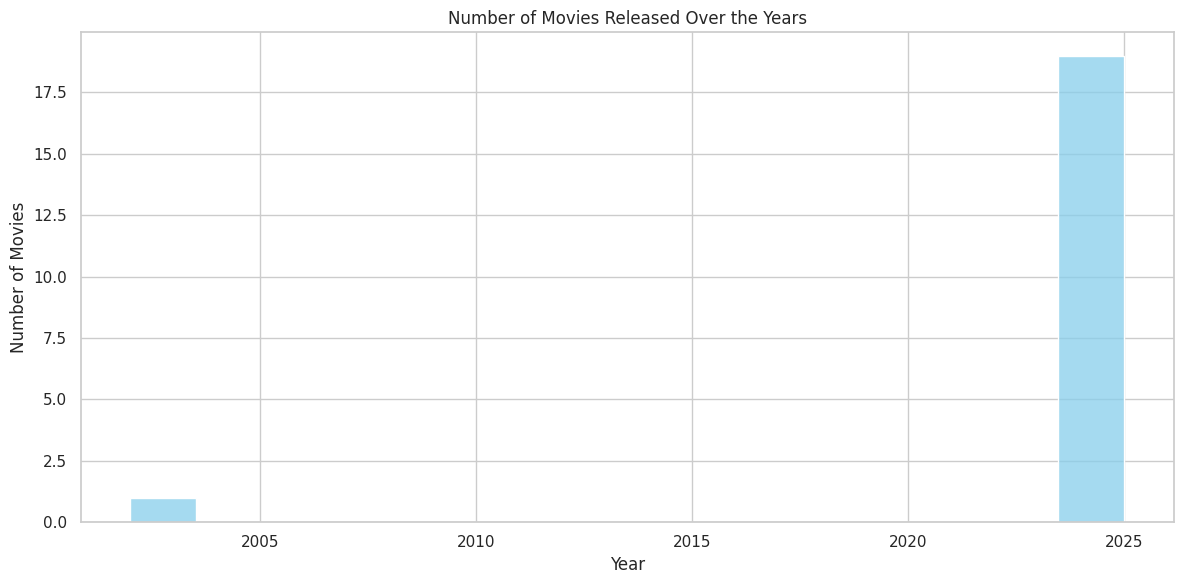

In [12]:
# 4. Movies Released Over Time (Histogram)
plt.figure(figsize=(12, 6))
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')  # Convert to datetime
df = df.dropna(subset=['Release Date'])
df['Year'] = df['Release Date'].dt.year
sns.histplot(df['Year'], bins=15, kde=False, color='skyblue')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

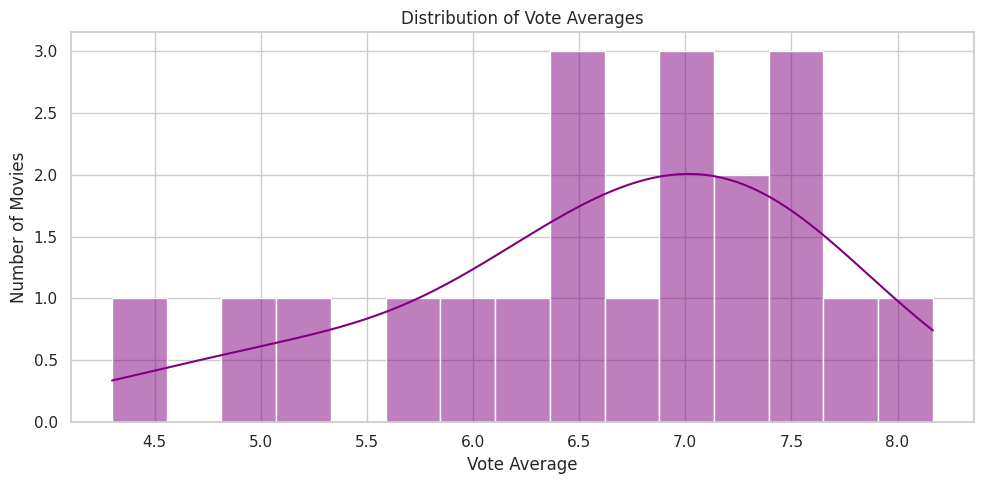

In [13]:
# 5. Distribution of Vote Average
plt.figure(figsize=(10, 5))
sns.histplot(df['Vote Average'], bins=15, kde=True, color='purple')
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

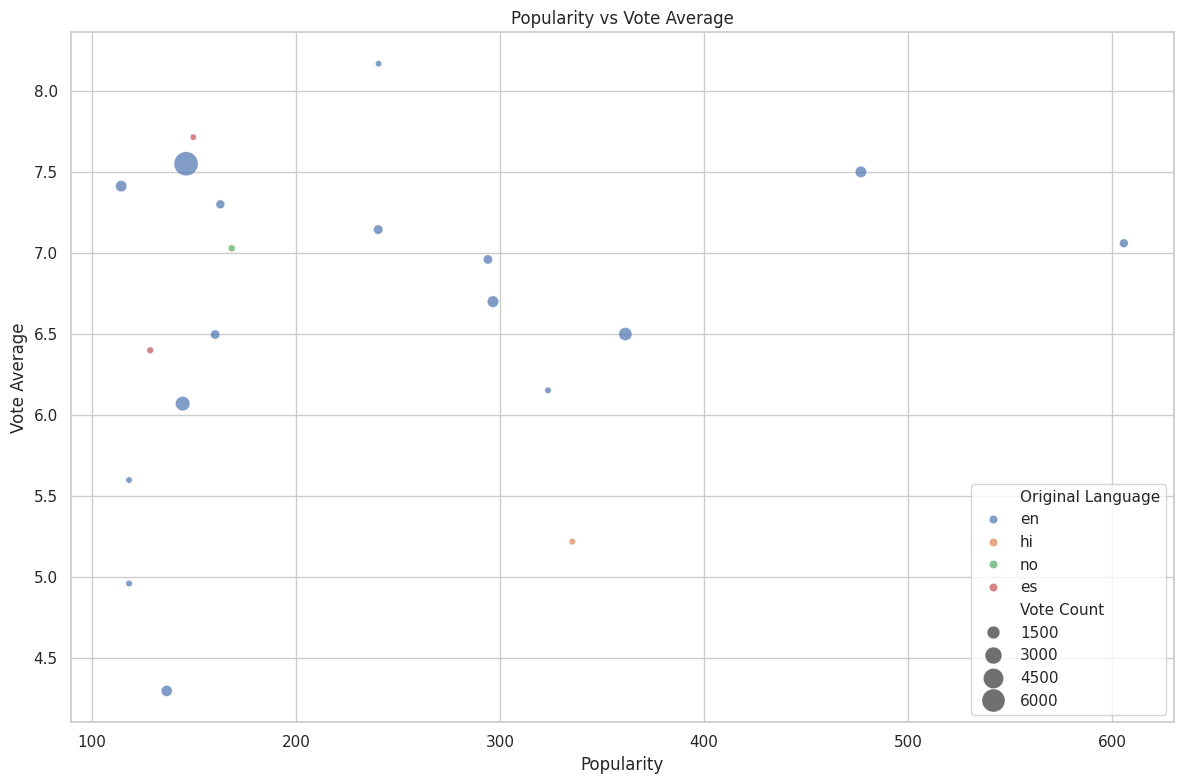

In [14]:
# 6. Popularity vs Vote Average (with Titles)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Popularity', y='Vote Average', data=df, hue='Original Language', size='Vote Count', sizes=(20, 300), alpha=0.7)
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()

<ipython-input-15-0e9b76ad8859>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vote Count', y='Title', data=top_votes, palette='magma')


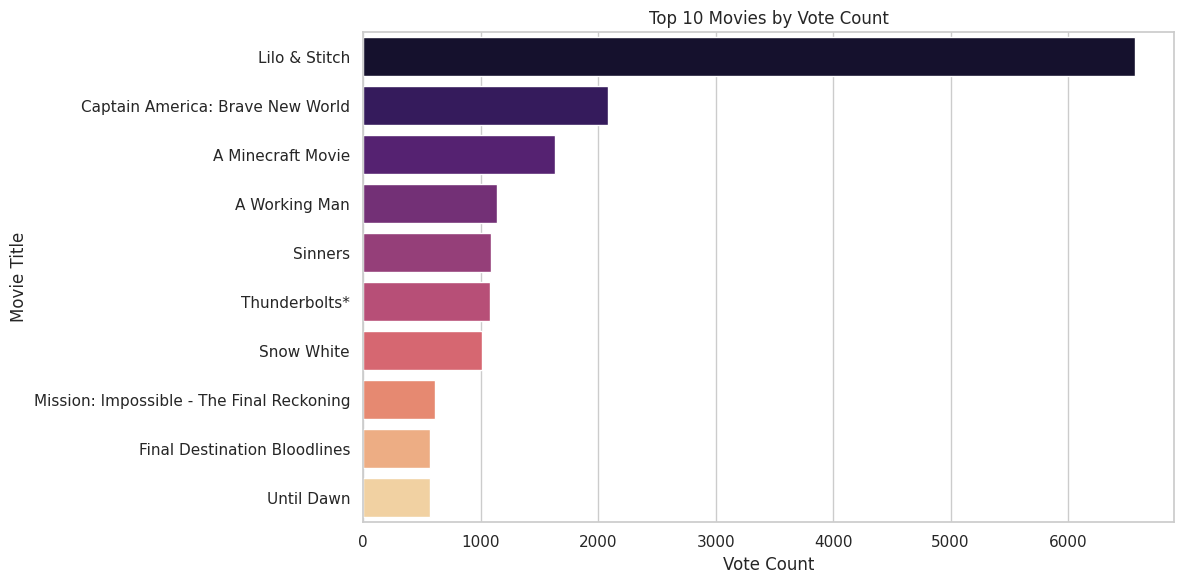

In [15]:
# 7. Top 10 Movies by Vote Count
plt.figure(figsize=(12, 6))
top_votes = df.sort_values(by='Vote Count', ascending=False).head(10)
sns.barplot(x='Vote Count', y='Title', data=top_votes, palette='magma')
plt.title('Top 10 Movies by Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()


<ipython-input-16-6d806b3fa650>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_count.index, y=lang_count.values, palette='cubehelix')


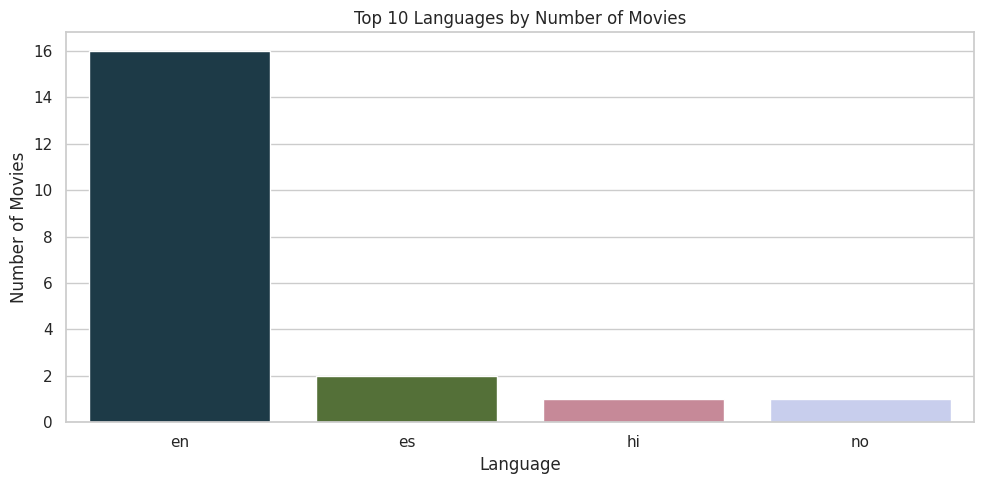

In [16]:
# 8. Languages by Number of Movies
plt.figure(figsize=(10, 5))
lang_count = df['Original Language'].value_counts().head(10)
sns.barplot(x=lang_count.index, y=lang_count.values, palette='cubehelix')
plt.title('Top 10 Languages by Number of Movies')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

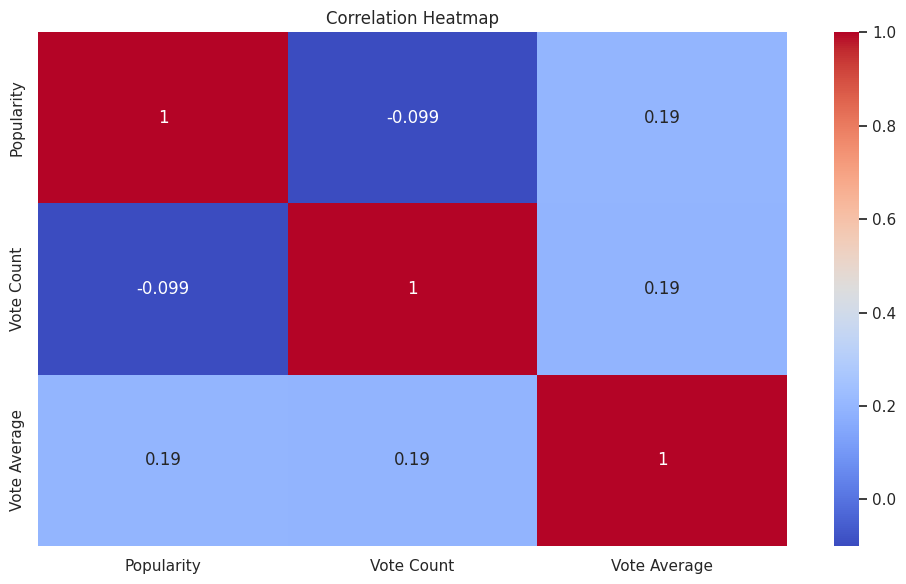

In [19]:
# 10. Heatmap of Numerical Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Popularity', 'Vote Count', 'Vote Average']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
